<a href="https://colab.research.google.com/github/mleyvaz/redes/blob/main/deteccion_de_anomalias_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
%cd /content/drive/MyDrive/logs

[Errno 2] No such file or directory: '/content/drive/MyDrive/logs'
/content/drive/MyDrive/network


In [5]:
!ls

logs.log	   swich22.csv	 swich2.csv  swichO.csv     train_data.csv
Submit_sample.csv  swich22.xlsx  swich.csv   test_data.csv


In [ ]:
import pandas as pd
redes = pd.read_csv('swichO.csv', header=0)
redes.head()



,Perdida de paquetes(RAW),Disponibilidad de sistema,"Power Supply 1009 (Switch 1 - Power Supply A, Unknown) (Normal)",Available Memory 1 (Processor),Fecha Hora,Tiempo de Ping(RAW),Disponibilidad de sistema(RAW),CPU 1000(RAW),"Temperature 1006 (Switch 1 - Temp Sensor 0, GREEN )(RAW)","Temperature 1007 (Switch 1 - Temp Sensor 1, GREEN )(RAW)",Temperature 1008
0,discrete,149\ d 150\ d 151\ d,discrete,discrete,time,continuous,12894667 12897907 12901507 12905107 12908707 1...,continuous,continuous,continuous,continuous
1,NaN,NaN,NaN,NaN,meta,meta,meta,meta,meta,meta,meta
2,0,149 d,100%,338 MByte,?,NaN,12955507,NaN,30.0,38.0,NaN


In [ ]:
redes.describe()

,GREEN )(RAW);Temperature 1008
count,10.00000
mean,3704.80000
std,4129.53088
min,3.00000
25%,57.50000
50%,2417.00000
75%,7541.50000
max,9833.00000


In [ ]:
pip install pycaret

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:

dataset = get_data('swich2')

,Fecha Hora;Tiempo de Ping(RAW);Perdida de paquetes(RAW);Trafico suma (volumen);Trafico suma (volumen)(RAW);Trafico suma (velocidad);Trafico suma (velocidad)(RAW);Disponibilidad de sistema;Disponibilidad de sistema(RAW);Power Supply 1009 (Switch 1 - Power Supply A,Unknown) (Normal);CPU 1000(RAW);Available Memory 1 (Processor);Temperature 1006 (Switch 1 - Temp Sensor 0,GREEN )(RAW);Temperature 1007 (Switch 1 - Temp Sensor 1,GREEN )(RAW);Temperature 1008 (Switch 1 - Temp Sensor 2,GREEN )(RAW)
03/02/2020 15:00:00 - 16:00:00;2,1432;0;;;;;149 d;12894667;100%;1,8542;338 MByte;33,2979;40,5106;43,8723.0
03/02/2020 16:00:00 - 17:00:00;2,75;0;;;;;149 d;12897907;100%;2,1;338 MByte;34;41;44,1833,NaN,NaN
03/02/2020 17:00:00 - 18:00:00;2,135;0;;;;;149 d;12901507;100%;1,7167;338 MByte;34,2833;41;44,4333,NaN
03/02/2020 18:00:00 - 19:00:00;2,0817;0;;;;;149 d;12905107;100%;1,35;338 MByte;33,9;40,9;43,9833.0
03/02/2020 19:00:00 - 20:00:00;2,3933;0;;;;;149 d;12908707;100%;1,4333;338 MByte;33,05;40,0167;43,55.0


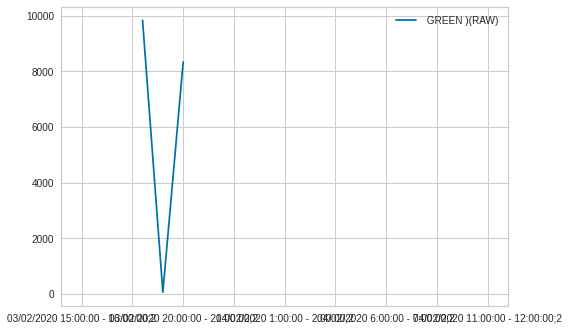

In [ ]:
dataset.plot()

In [ ]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (37, 5)
Unseen Data For Predictions: (2, 5)


In [ ]:
from pycaret.anomaly import *

exp_ano101 = setup(data, normalize = True, 
                   session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(37, 5)"
2,Missing Values,True
3,Numeric Features,0
4,Categorical Features,5
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(37, 128)"
9,CPU Jobs,-1


In [ ]:

iforest = create_model('iforest')
print(iforest)

IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=123, verbose=0)


In [ ]:
svm = create_model('svm', fraction = 0.025)

In [ ]:
iforest_results = assign_model(iforest)
iforest_results.head()

,Fecha Hora;Tiempo de Ping(RAW);Perdida de paquetes(RAW);Trafico suma (volumen);Trafico suma (volumen)(RAW);Trafico suma (velocidad);Trafico suma (velocidad)(RAW);Disponibilidad de sistema;Disponibilidad de sistema(RAW);Power Supply 1009 (Switch 1 - Power Supply A,Unknown) (Normal);CPU 1000(RAW);Available Memory 1 (Processor);Temperature 1006 (Switch 1 - Temp Sensor 0,GREEN )(RAW);Temperature 1007 (Switch 1 - Temp Sensor 1,GREEN )(RAW);Temperature 1008 (Switch 1 - Temp Sensor 2,GREEN )(RAW),Anomaly,Anomaly_Score
0,2167;0;;;;;150 d;13013107;100%;1,4333;338 MByte;31,9833;39;43,NaN,NaN,0,-0.023949
1,1033;0;;;;;150 d;12962707;100%;1,7833;338 MByte;30;38;42,4,NaN,NaN,0,-0.019566
2,0583;0;;;;;149 d;12915907;100%;1,1833;338 MByte;33;40,4;44,NaN,NaN,0,-0.032613
3,5583;0;;;;;150 d;12969907;100%;1,8167;338 MByte;30,8833;38,2167;42,NaN,0,-0.031360
4,45;0;;;;;150 d;12984307;100%;1,9333;338 MByte;31,9833;39,4333;43,NaN,0,-0.014532


In [ ]:
plot_model(iforest)

In [ ]:
iforest_results.head()

In [ ]:
iforest_results.sort_values('Anomaly')

,Fecha Hora;Tiempo de Ping(RAW);Perdida de paquetes(RAW);Trafico suma (volumen);Trafico suma (volumen)(RAW);Trafico suma (velocidad);Trafico suma (velocidad)(RAW);Disponibilidad de sistema;Disponibilidad de sistema(RAW);Power Supply 1009 (Switch 1 - Power Supply A,Unknown) (Normal);CPU 1000(RAW);Available Memory 1 (Processor);Temperature 1006 (Switch 1 - Temp Sensor 0,GREEN )(RAW);Temperature 1007 (Switch 1 - Temp Sensor 1,GREEN )(RAW);Temperature 1008 (Switch 1 - Temp Sensor 2,GREEN )(RAW),Anomaly,Anomaly_Score
0,2167;0;;;;;150 d;13013107;100%;1,4333;338 MByte;31,9833;39;43,NaN,NaN,0,-0.023949
20,0717;0;;;;;150 d;13005907;100%;1,5167;338 MByte;31,6667;39;42,95,NaN,0,-0.050307
22,2317;0;;;;;149 d;12912307;100%;1,4833;338 MByte;33,05;40,45;43,8333.0,0,-0.010462
23,3567;0;;;;;150 d;12980707;100%;1,7833;338 MByte;31,7333;39;43,NaN,NaN,0,-0.039061
24,0667;0;;;;;150 d;13020307;100%;1,25;338 MByte;31,95;39;42,9167,NaN,0,-0.027263
25,135;0;;;;;149 d;12901507;100%;1,7167;338 MByte;34,2833;41;44,4333,NaN,0,-0.021808
26,3933;0;;;;;149 d;12908707;100%;1,4333;338 MByte;33,05;40,0167;43,55.0,0,-0.039283
35,235;0;;;;;150 d;12966307;100%;1,8;338 MByte;30,0833;38,2;42,4667.0,0,-0.007564
27,1917;0;;;;;150 d;13009507;100%;1,5667;338 MByte;31,9167;39;43,NaN,NaN,0,-0.041619
29,0017;0;;;;;149 d;12955507;100%;2,0167;338 MByte;30;38;42,0333,NaN,NaN,0,-0.021648


In [ ]:
unseen_predictions = predict_model(iforest, data=data_unseen)
unseen_predictions.head()



,Fecha Hora;Tiempo de Ping(RAW);Perdida de paquetes(RAW);Trafico suma (volumen);Trafico suma (volumen)(RAW);Trafico suma (velocidad);Trafico suma (velocidad)(RAW);Disponibilidad de sistema;Disponibilidad de sistema(RAW);Power Supply 1009 (Switch 1 - Power Supply A,Unknown) (Normal);CPU 1000(RAW);Available Memory 1 (Processor);Temperature 1006 (Switch 1 - Temp Sensor 0,GREEN )(RAW);Temperature 1007 (Switch 1 - Temp Sensor 1,GREEN )(RAW);Temperature 1008 (Switch 1 - Temp Sensor 2,GREEN )(RAW),Anomaly,Anomaly_Score
0,755;0;;;;;150 d;12977107;100%;1,9167;338 MByte;31,0333;39;43,NaN,NaN,0,-0.023114
1,24;0;;;;;150 d;13002307;100%;1,6;338 MByte;31,6167;39;43,NaN,NaN,0,-0.023114
